# Iris Clustering Project

Welcome to the second project! We'll be using the scikit-learn library again to build a clustering model for the Iris dataset. This dataset is a classic dataset in the machine learning community but is labeled. Remember, clustering is an unsupervised learning technique, so we'll be ignoring the labels to train the model, but we'll use them to evaluate the model's performance.

The [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) consists of 150 samples of iris flowers. Each sample has four features: sepal length, sepal width, petal length, and petal width. The goal is to group the samples into clusters based on these features.

The three classes in the Iris dataset are:

- Iris-setosa
- Iris-versicolour
- Iris-virginica

and the dataset is balanced, meaning it has an equal number of samples for each class.

The required libraries will be installed for you in the next cell if you don't have them already.

In [68]:
!pip install -q scikit-learn pandas numpy matplotlib seaborn scipy

## Instructions

In the next cell, we'll need to:

1. Load the Iris dataset as a pandas DataFrame.
2. Extract the feature and the target labels.
3. Normalize the features.

In [ ]:
from sklearn.datasets import load_iris

# Load the iris dataset as a dataframe
iris = load_iris(as_frame=True)
data = iris.data
iris_labels = iris.target

# Normalize the dataset
data = (data - data.mean()) / data.std()

# Display the first 5 rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


## Instructions

Great! Now that we've loaded the data, let's start by exploring the dataset.

Remember, we're going to ignore the target labels for now and focus on the features for the clustering model. But we'll use the labels to explore the dataset.

In the next cell, we'll need to:
1. Create a pair plot of the features to visualize the relationships between them.
2. Color the data points based on the target labels.

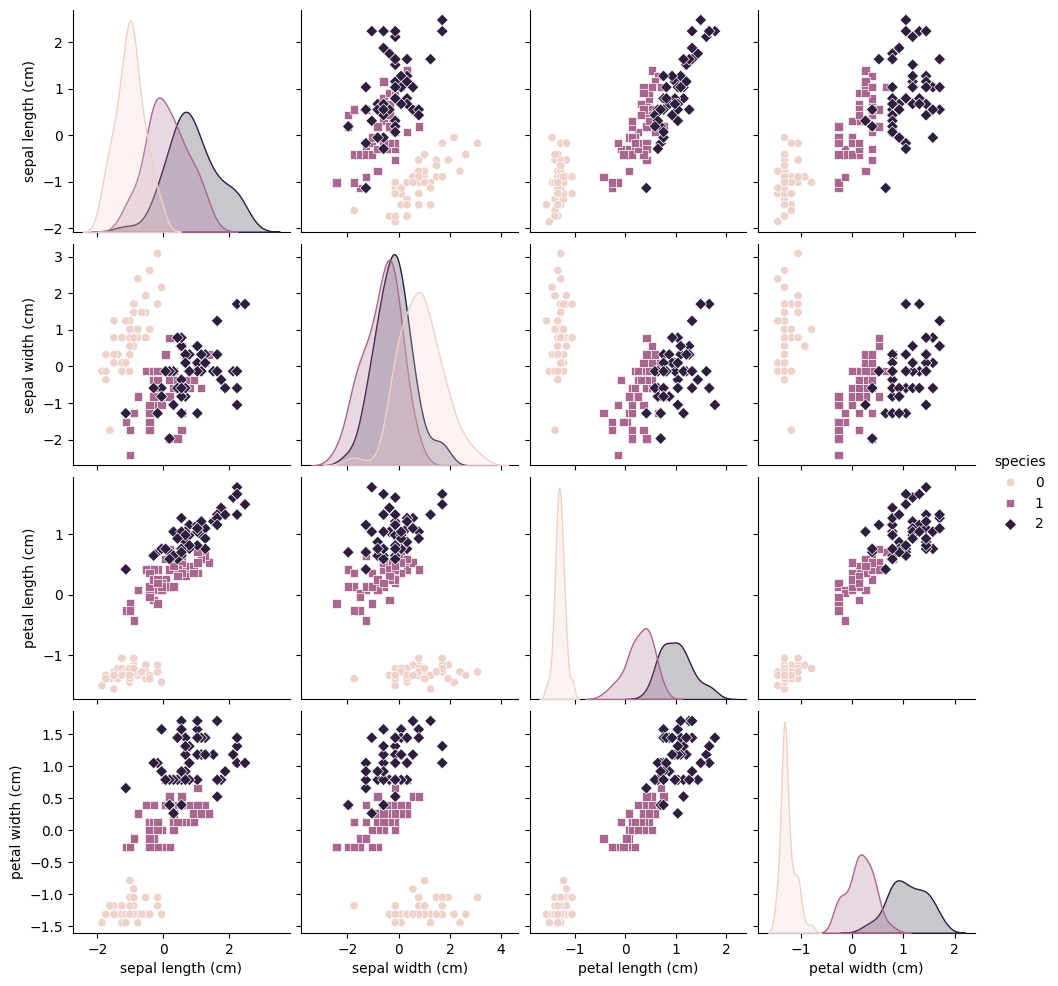

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the data and labels for visualization
data_with_labels = data.copy()
data_with_labels["species"] = iris_labels

# Create a pair plot and color the points by species
sns.pairplot(data_with_labels, hue="species", markers=["o", "s", "D"])
plt.show()

Run this next cell to define a function that will be used to evaluate model performance with the target labels.

The clustering and target species indices might not match even if the model is performing well. So the function will find the best matching between the predicted clusters and the target labels and calculate the accuracy based on that.

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix


def calculate_accuracy(true_labels: np.ndarray, predicted_labels: np.ndarray) -> None:
    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Use the linear_sum_assignment to find the best matching
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)

    # Calculate the accuracy based on the best matching
    correct = (
        sum(conf_matrix[row, col] for row, col in zip(row_ind, col_ind))
        / float(len(true_labels))
        * 100
    )

    print(f"Accuracy: {correct:.2f}%")

## Instructions

Let's start by fitting a k-means clustering model to the Iris dataset. Given our knowledge of the dataset, we'll set the number of clusters to 3.

Run a prediction on the features and use the `calculate_accuracy` function to evaluate the model's performance.

In the next cell:

1. Fit a k-means clustering model to the Iris dataset.
2. Predict the clusters for the features.
3. Evaluate the model's performance using the `calculate_accuracy` function.

In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Predict the clusters
clusters = kmeans.predict(data)

# Add the cluster predictions to the dataframe
data_with_labels["cluster"] = clusters

# Print the accuracy of the clustering using calculate_accuracy
calculate_accuracy(iris_labels, clusters)

Accuracy: 81.33%


Now, let's visualize the clusters to see how well the model performed.

In the next cell, create 4 scatter plots:

1. sepal length vs. sepal width -- color by actual species
2. petal length vs. petal width -- color by actual species
3. sepal length vs. sepal width -- color by predicted cluster
4. petal length vs. petal width -- color by predicted cluster

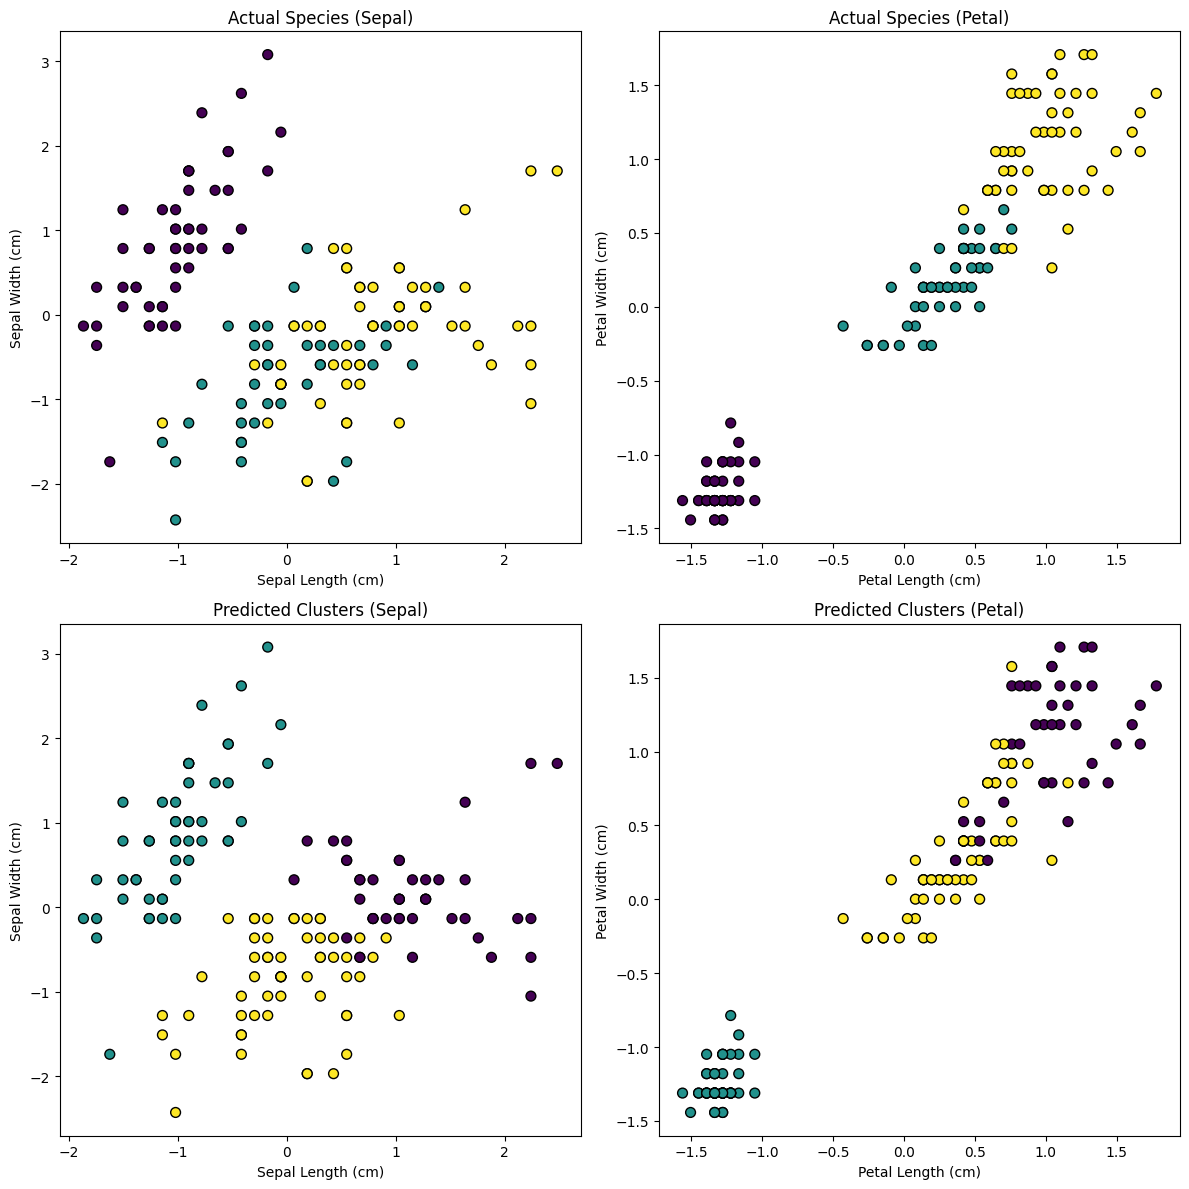

In [ ]:
plt.figure(figsize=(12, 12))

# Plot the actual species
plt.subplot(2, 2, 1)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(2, 2, 2)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Plot the predicted clusters
plt.subplot(2, 2, 3)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Predicted Clusters (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(2, 2, 4)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Predicted Clusters (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

## Reflection

The model does pretty well in clustering the Iris dataset! But what was one of the assumptions we made when training the model? We assumed that the number of clusters was 3 because we knew the dataset had 3 classes. But what if we didn't know that? How could we determine the optimal number of clusters?

### Elbow Method

One way to determine the optimal number of clusters is to use the elbow method. The elbow method is a heuristic used to determine the optimal number of clusters in a dataset. The idea is to run the clustering algorithm for a range of cluster numbers and plot the sum of squared distances of samples to their closest cluster center. The point where the plot starts to flatten out is the optimal number of clusters.

### Silhouette Score

Another way to determine the optimal number of clusters is to use the silhouette score. The silhouette score is a measure of how similar an object is to its cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

0.5 is considered a good silhouette score, and a score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

## Instructions

In the next cell:
1. Perform both the elbow method and silhouette score to determine the optimal number of clusters.
2. Plot the elbow method and silhouette score results.

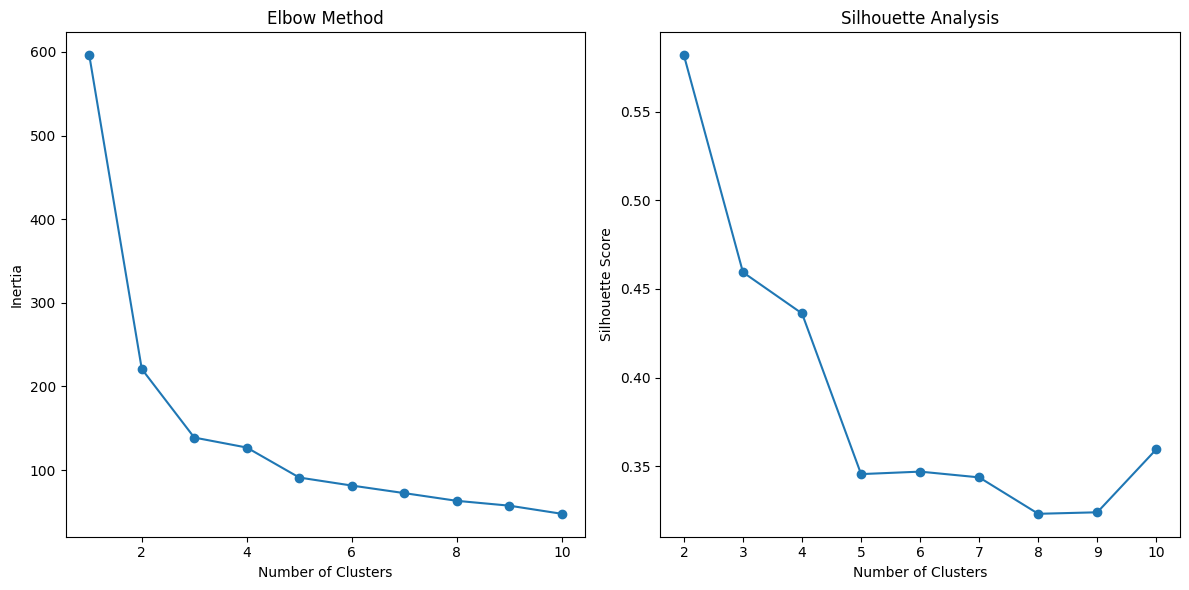

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette scores for a range of cluster numbers
inertia = []
silhouette_scores = []
for n in range(1, 11):
    # Initialize the KMeans model with n clusters
    kmeans = KMeans(n_clusters=n)

    # Fit the model to the data and predict the clusters
    clusters = kmeans.fit_predict(data)

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

    # Skip silhouette score for 1 cluster
    if n > 1:
        # Calculate the silhouette score and append it to the list
        silhouette_scores.append(silhouette_score(data, clusters))
    else:
        silhouette_scores.append(float("nan"))

plt.figure(figsize=(12, 6))

# Plot the inertia to find the elbow point
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Plot the silhouette scores to find the optimal number of clusters
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), silhouette_scores, marker="o")
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

## Reflection

We can tell by the elbow method that 2-3 is where the plot starts to flatten out, indicating that 2-3 clusters are optimal. The silhouette score also indicates that 2 clusters are optimal.

## Instructions

Now that we have the optimal number of clusters, let's train a k-means clustering model with 2 clusters and evaluate its performance.

In the next cell:
1. Fit a k-means clustering model to the Iris dataset with 2 clusters.
2. Predict the clusters for the features.
3. Plot the clusters to visualize the model's performance.

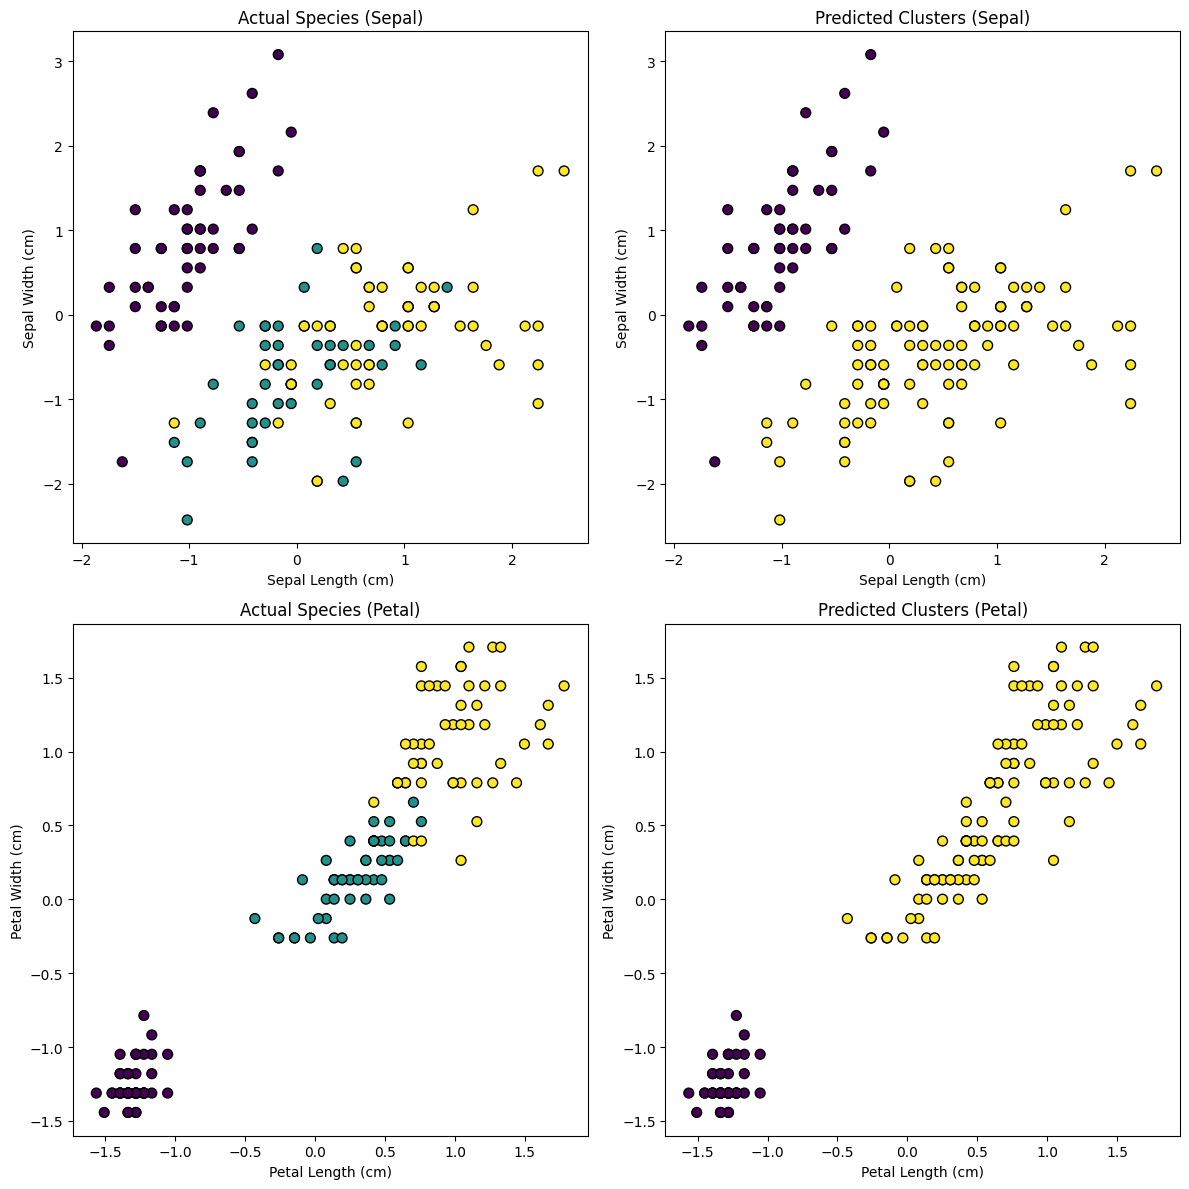

In [ ]:
# Initialize the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data and predict the clusters
clusters = kmeans.fit_predict(data)

# Add the cluster predictions to the dataframe
data_with_labels["cluster"] = clusters

# Plot the predicted clusters and actual species
plt.figure(figsize=(12, 12))

# Plot the actual species (Sepal)
plt.subplot(2, 2, 1)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# Plot the predicted clusters (Sepal)
plt.subplot(2, 2, 2)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Predicted Clusters (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# Plot the actual species (Petal)
plt.subplot(2, 2, 3)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Plot the predicted clusters (Petal)
plt.subplot(2, 2, 4)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Predicted Clusters (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

## Reflection

The model does a great job of clustering the Iris dataset into 2 clusters! The elbow method and silhouette score helped us determine the optimal number of clusters, and the model performed well.

I haven't actually done research into the Iris dataset, but I'm guessing it is known that the Iris-setosa class is very distinct from the other two classes, which is why the model performs well with 2 clusters.

To recap: we loaded the Iris dataset, explored the dataset, and trained a k-means clustering model. There are many other clustering algorithms to explore. Let's look at one more clustering algorithm: hierarchical clustering.

### K-Means Clustering

K-means clustering is a type of clustering algorithm that partitions data into k clusters. It starts by randomly selecting k centroids and assigns each data point to the nearest centroid. It then recalculates the centroids based on the mean of the data points assigned to each cluster. This process continues until the centroids no longer change.

### Hierarchical Clustering

Hierarchical clustering is a type of clustering algorithm that builds a hierarchy of clusters. It starts with each data point as a separate cluster and then merges the closest clusters together. This process continues until all data points are in a single cluster.

Hierarchical clustering can be agglomerative or divisive. Agglomerative hierarchical clustering starts with each data point as a separate cluster and then merges the closest clusters together. Divisive hierarchical clustering starts with all data points in a single cluster and then splits the clusters apart.

The scikit-learn library has an implementation of agglomerative hierarchical clustering. Let's train an agglomerative hierarchical clustering model on the Iris dataset.

## Instructions

In the next cell:
1. Fit an agglomerative hierarchical clustering model to the Iris dataset with 3 clusters.
2. Predict the clusters for the features.
3. Evaluate the model's performance using the `calculate_accuracy` function.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data and predict the clusters
hierarchical_clusters = hierarchical_clustering.fit_predict(data)

# Add the hierarchical cluster predictions to the dataframe
data_with_labels["hierarchical_cluster"] = hierarchical_clusters

# Calculate the percentage of correct predictions using calculate_accuracy
calculate_accuracy(iris_labels, hierarchical_clusters)

Accuracy: 82.67%


## Reflection

The agglomerative hierarchical clustering model performs well on the Iris dataset! The model does a great job of clustering the Iris dataset into 3 clusters. It is just about as accurate as the k-means clustering model.

## Instructions

Now that we've trained both a k-means clustering model and an agglomerative hierarchical clustering model on the Iris dataset, let's generate the same plots to compare the two models.

In the next cell, create 4 scatter plots:

1. sepal length vs. sepal width -- color by actual species
2. petal length vs. petal width -- color by actual species
3. sepal length vs. sepal width -- color by predicted cluster
4. petal length vs. petal width -- color by predicted cluster

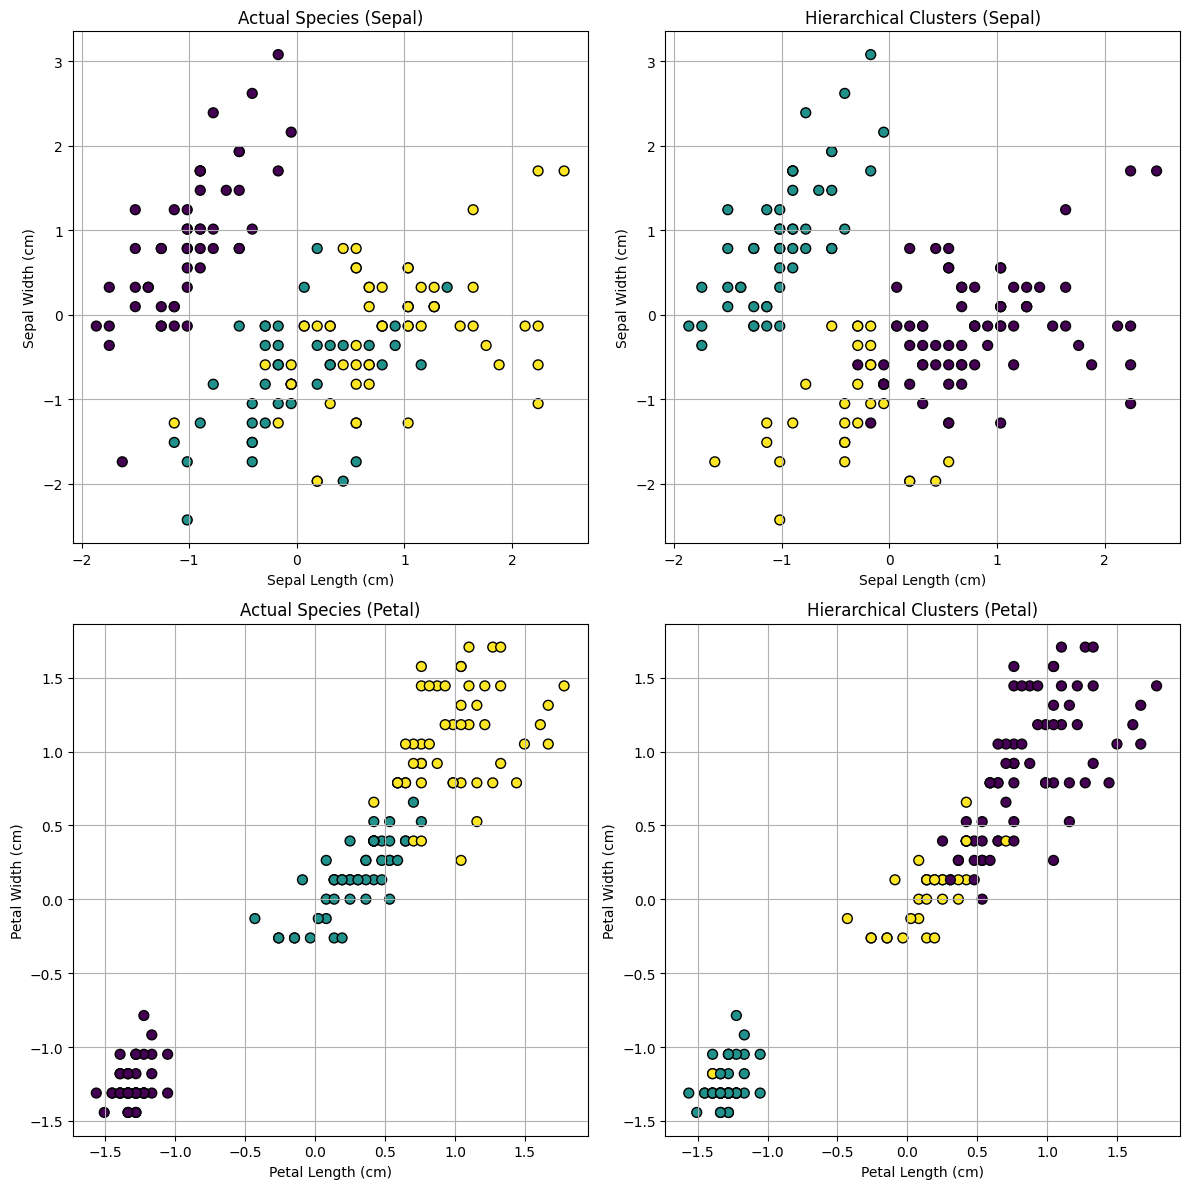

In [ ]:
# Plot the hierarchical clusters and actual species
plt.figure(figsize=(12, 12))

# Plot the actual species (Sepal)
plt.subplot(2, 2, 1)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.grid(True)

# Plot the hierarchical clusters (Sepal)
plt.subplot(2, 2, 2)
plt.scatter(
    data["sepal length (cm)"],
    data["sepal width (cm)"],
    c=hierarchical_clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Hierarchical Clusters (Sepal)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.grid(True)

# Plot the actual species (Petal)
plt.subplot(2, 2, 3)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=iris_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Actual Species (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)

# Plot the hierarchical clusters (Petal)
plt.subplot(2, 2, 4)
plt.scatter(
    data["petal length (cm)"],
    data["petal width (cm)"],
    c=hierarchical_clusters,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("Hierarchical Clusters (Petal)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.grid(True)

plt.tight_layout()
plt.show()

## Reflection

We're still operating under the assumption that the number of clusters is 3 because we know the Iris dataset has 3 classes. But what if we didn't know that? How could we determine the optimal number of clusters?

Inertia is a metric used to evaluate the performance of clustering algorithms like K-Means. It measures the sum of squared distances between each point and the centroid of its assigned cluster. Lower inertia indicates tighter clusters.

However, Agglomerative Clustering is a hierarchical clustering method that does not rely on centroids. Instead, it builds clusters by iteratively merging or splitting them based on a linkage criterion (e.g., single, complete, average linkage). Since there are no centroids in Agglomerative Clustering, inertia is not a relevant metric for evaluating its performance.

Instead, you might consider other metrics such as:

- Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.
- Dendrogram: A tree-like diagram that records the sequences of merges or splits.
These metrics are more appropriate for hierarchical clustering methods like Agglomerative Clustering.

## Instructions

In the next cell:

1. Perform the silhouette score to determine the optimal number of clusters for the k-means clustering model.
2. Plot the silhouette score results.
3. Generate the linkage matrix for the agglomerative hierarchical clustering model.
4. Plot the dendrogram.

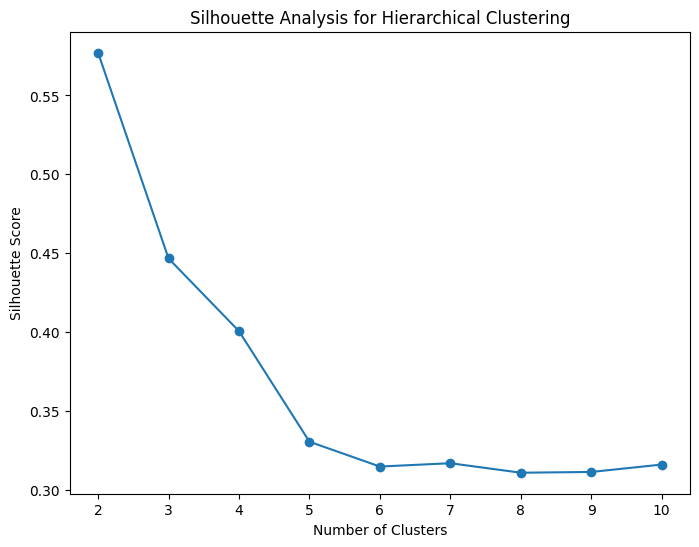

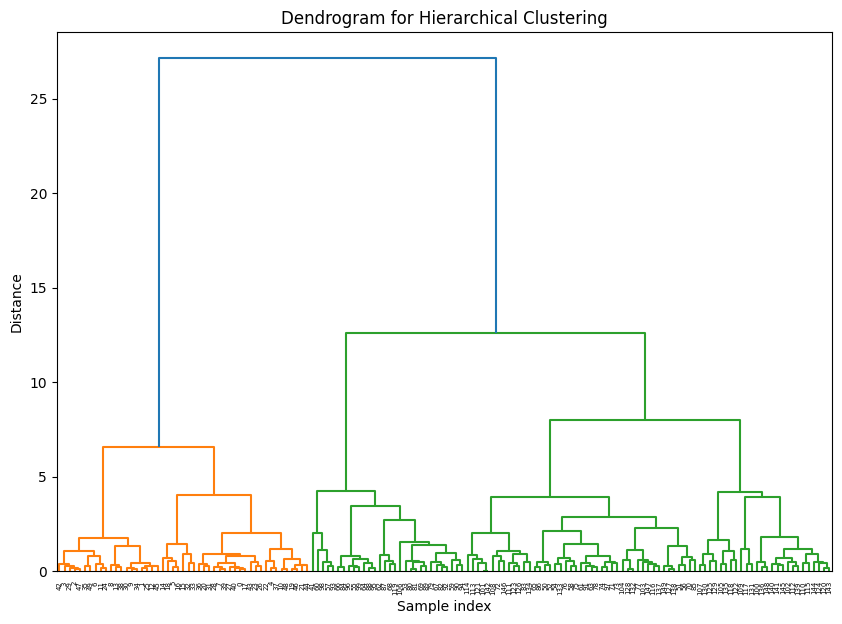

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores_hierarchical = []

# Calculate silhouette scores for a range of cluster numbers
for n_clusters in range(2, 11):
    # Initialize the AgglomerativeClustering model with n clusters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the data and predict the clusters
    clusters = hierarchical_clustering.fit_predict(data)

    # Calculate the silhouette score and append it to the list
    silhouette_scores_hierarchical.append(silhouette_score(data, clusters))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores_hierarchical, marker="o")
plt.title("Silhouette Analysis for Hierarchical Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Generate the linkage matrix
Z = linkage(data, "ward")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

## Reflection

The dendogram is a really cool visualization of the hierarchical clustering process! We can pick out the cluster that really contains two species but looks like it might only contain one species.

## Final Thoughts

We've explored the Iris dataset and trained two clustering models: k-means clustering and agglomerative hierarchical clustering. We used the elbow method and silhouette score to determine the optimal number of clusters for the k-means clustering model and generated a dendrogram for the agglomerative hierarchical clustering model.

In practice:

- K-Means Clustering

  This algorithm is simple and easy to implement. It is computationally efficient and works well with large datasets. However, it requires the number of clusters to be specified a priori and is sensitive to the initial cluster centers.

- Agglomerative Hierarchical Clustering

    This algorithm is more flexible and does not require the number of clusters to be specified a priori. It can handle different types of data and is robust to noise and outliers. However, it is computationally expensive and does not scale well with large datasets.

## Next Steps

There are many other clustering algorithms to explore, such as DBSCAN, Mean Shift, and Spectral Clustering. If you are interested in learning more about clustering of **unlabeled data**, check out some more algorithms.

When you're done, continue on to the next project!